In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors


In [ ]:
df = pd.read_csv('NSDUH_2019_Tab.txt',delimiter = "\t")
df.head()

# Data preprocessing:

slicing data to only relevent questions, as stated in project:

In [3]:
questions = df.keys()

In [4]:
MJ_questions = [x for x in questions if x.startswith('MJ')]
DP_question = ['AMDEYR']
main_x = ['AGE2', 'HEALTH',  'IRSEX', 'IRMARIT', 'NEWRACE2', 'EDUHIGHCAT', 'INCOME']


In [5]:
relev_question = []
relev_question.extend(main_x)
relev_question.extend(MJ_questions)
relev_question.extend(DP_question)

In [6]:
df = df[relev_question]

removing all subjected under the age of 18:

In [7]:
df = df.drop(df[df.AGE2 < 7].index)


Changing Health categories, as explained in project:

In [8]:
df.loc[df['HEALTH']==1, 'HEALTH'] = 2
df.loc[df['HEALTH']==3, 'HEALTH'] = 1
df.loc[df['HEALTH']==4, 'HEALTH'] = 1
df.loc[df['HEALTH']==5, 'HEALTH'] = 0
df = df.drop(df[df.HEALTH > 3].index)

Updating values of outcome to match 0 or 1:

In [9]:
df.loc[df['AMDEYR']==2, 'AMDEYR'] = 0

Calculating treatment, 1 as smoked in the last year but not in the last month, and 0 as never smoked, based on questions stated in the project:

In [10]:
df['T'] = [0]*len(df)

In [11]:
df = df.drop(df[df.MJEVER > 2].index) # removing those who did not give information about there use
df = df.drop(df[df.MJYRTOT == 985].index) # bad data
df = df.drop(df[df.MJYRTOT > 993].index) # removing does that did use but not in the last years and removing does that did not answer
df = df.drop(df[df.MJREC <= 2].index) # using in the last year
df = df.drop(df[df.MJREC == 11].index) # filled answered based on other questions of using in the last month
df = df.drop(df[df.MJREC == 8].index) # filled answered based on other questions of using in the last year
df = df.drop(df[df.MJREC == 9].index) # filled answered based on other questions of using in the last year

df = df.drop(df[df.MJREC > 97].index)

df.dropna(inplace=True)

In [ ]:
# df.loc[df['MJREC']==2, 'T'] = 1
# df.loc[df['MJREC']==8, 'T'] = 1 # filled answered based on other questions
# # removing questions about marijuana after computing treatment
# df = df.drop(MJ_questions,axis=1)

In [12]:
df.loc[df['MJREC']==3, 'T'] = 1


In [13]:
# removing questions about marijuana after computing treatment
df = df.drop(MJ_questions,axis=1)

# Analyzing data:

Histogramps:

In [14]:
ages_ind = df['AGE2'].values
ages_order = ['18', '19', '20', '21', '22-23', '24-25', '26-29','30-34', '35-49', '50-64', '65-older']
ages = [0]*len(ages_order)
for i in range(len(ages_ind)):
    x = ages_ind[i]
    ages[x-7] += 1

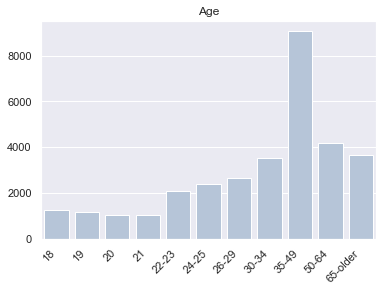

In [15]:
sns.set(style='darkgrid')
sns.barplot(x = ages_order, y=ages,  color='lightsteelblue',order=ages_order)
plt.title('Age')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light')
plt.show()

In [16]:
gender_ind = df['IRSEX'].values
gender = ['Male', 'Female']
gender_count = [0]*len(gender)
for g in gender_ind:
    gender_count[g-1] += 1

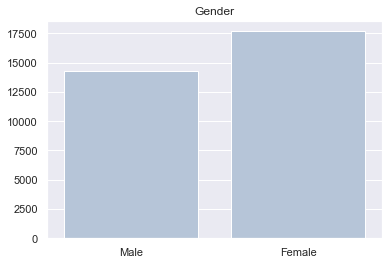

In [17]:
sns.set(style='darkgrid')
sns.barplot(x=gender, y=gender_count,  color='lightsteelblue', order=gender)
plt.title('Gender')
plt.show()

In [18]:
marital_ind = df['IRMARIT'].values
marital_s = ['Married', 'Widowed', 'Divorced or Separated', 'Never been married']
marital_count = [0]*len(marital_s)
for m in marital_ind:
    if m == 99:
        continue
    marital_count[m-1] += 1

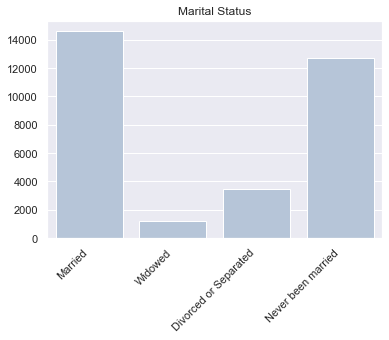

In [19]:
sns.set(style='darkgrid')
sns.barplot(x=marital_s, y=marital_count,  color='lightsteelblue', order=marital_s)
plt.title('Marital Status')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'
)
plt.show()

In [20]:
race_ind = df['NEWRACE2'].values
race = ['White', 'African American', 'Native American', 'Pacific Islands', 'Asian', 'More than one', 'Hispanic']
race_count = [0]*len(race)
for r in race_ind:
    race_count[r-1] += 1

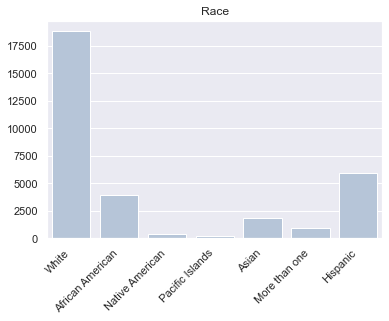

In [21]:
sns.set(style='darkgrid')
sns.barplot(x=race, y=race_count,  color='lightsteelblue', order=race)
plt.title('Race')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'
)
plt.show()

In [22]:
educ_ind = df['EDUHIGHCAT'].values
educ = ['Less than High School', 'High Scool Graduate', 'Some College years', 'College graduate']
educ_count = [0]*len(educ)
for e in educ_ind:
    educ_count[e-1] += 1

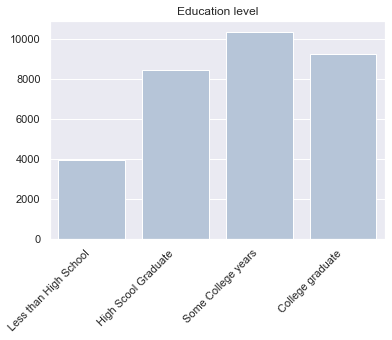

In [23]:
sns.set(style='darkgrid')
sns.barplot(x=educ, y=educ_count,  color='lightsteelblue', order=educ)
plt.title('Education level')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'
)
plt.show()

In [24]:
income_ind = df['INCOME'].values
income = ['Less than 20,000$', '20,000$-49,999$', '50,000$-74,999$', '75,000$ or More']
income_count = [0]*len(educ)
for e in income_ind:
    income_count[e-1] += 1

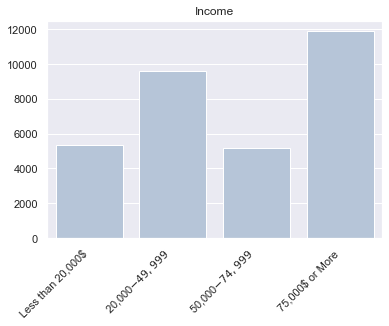

In [25]:
sns.set(style='darkgrid')
sns.barplot(x=income, y=income_count,  color='lightsteelblue', order=income)
plt.title('Income')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'
)
plt.show()

In [26]:
health_ind = df['HEALTH'].values
health = ['Poor', 'Good', 'Excelent']
health_count = [0]*len(health)
for h in health_ind:
    health_count[h] += 1

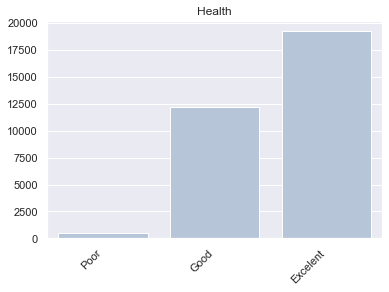

In [27]:
sns.set(style='darkgrid')
sns.barplot(x=health, y=health_count,  color='lightsteelblue', order=health)
plt.title('Health')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'
)
plt.show()

In [28]:
treatment_ind = df['T'].values
treatment = ['Control', 'Treatment']
treatment_count = [0]*len(treatment)
for t in treatment_ind:
    treatment_count[t] += 1

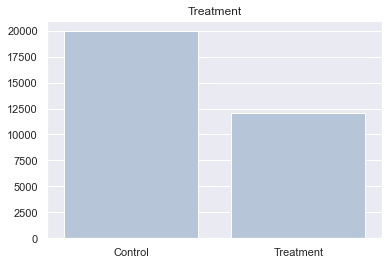

In [29]:
sns.set(style='darkgrid')
sns.barplot(x=treatment, y=treatment_count,  color='lightsteelblue', order=treatment)
plt.title('Treatment')
plt.show()

In [30]:
outcome_ind = df['T'].values
outcome = ['Not Depressed', 'Depressed']
outcome_count = [0]*len(outcome)
for o in outcome_ind:
    outcome_count[o] += 1

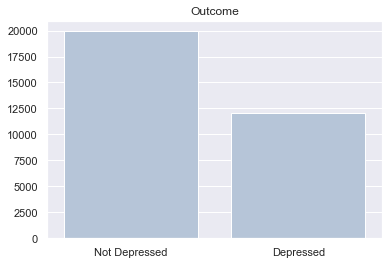

In [31]:
sns.set(style='darkgrid')
sns.barplot(x=outcome, y=outcome_count,  color='lightsteelblue', order=outcome)
plt.title('Outcome')
plt.show()

Joining categories in Race:

In [32]:
df.loc[df['NEWRACE2']==3, 'NEWRACE2'] = 8 #other
df.loc[df['NEWRACE2']==4, 'NEWRACE2'] = 8
df.loc[df['NEWRACE2']==6, 'NEWRACE2'] = 8

Creating heatmap to see correlation between the different parameters and the treatment and outcome:

In [33]:
def heatMap(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(15, 10))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".3f")
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()

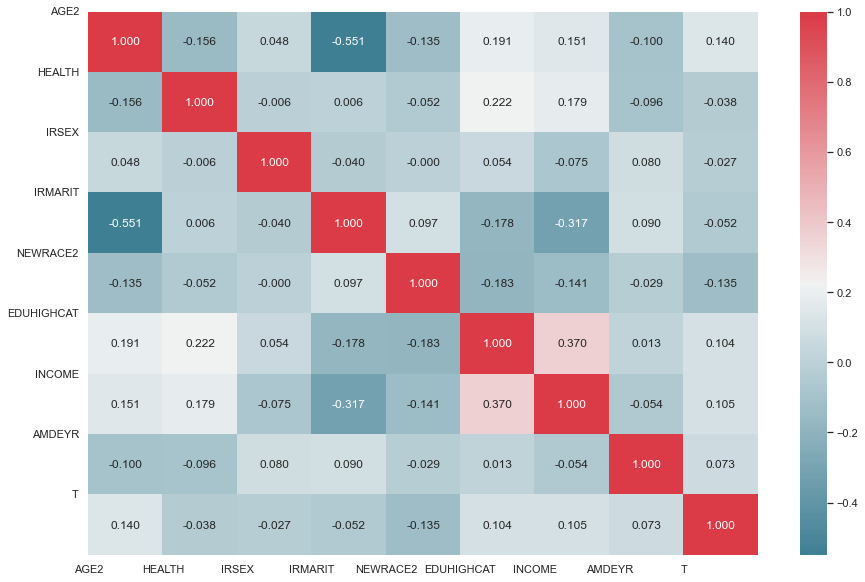

In [34]:
heatMap(df)

In [35]:
# backdoor cretiria:
df_temp = df[['HEALTH', 'IRMARIT', 'AGE2', 'EDUHIGHCAT', 'AMDEYR', 'T']]
data = pd.get_dummies(df_temp,columns = ['IRMARIT', 'EDUHIGHCAT'])


### Propensity Score:

In [36]:
def propensity_logistic(X, t):
    clf = LogisticRegression(random_state=0).fit(X, t)
    
    res = clf.predict_proba(X)[:,1]
    return pd.Series(data=res, index=df.index), clf

def propensity_randomforest(X, t):
    clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0).fit(X,t) 
    ps_score = np.asarray(clf.predict_proba(X))
    T_pred = clf.predict(X)
    #print('Accuracy RF: ' + str(accuracy_score(T,T_pred)))
    return pd.Series(data=ps_score[:,1], index=X.index), clf

def propensity_GBC(X, t):
    trees_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, 
                                           max_depth=1, random_state=0).fit(X, t)
    trees_propensity = trees_clf.predict_proba(X)[:, 1]
    return pd.Series(data=trees_propensity, index=X.index), trees_clf

In [37]:
X, t = data.drop(columns=['T','AMDEYR']), data['AMDEYR']
ps_logistic, logistic_model = propensity_logistic(X, t)
ps_rf, rf_model = propensity_randomforest(X, t)
ps_gbc, gbc_model = propensity_GBC(X, t)

Examining the models:

In [38]:
# accuracy
def acc(model, X, t):
    t_pred = model.predict(X)
    acc_score = sum(t==t_pred)/len(t)
    return acc_score

# roc curve
def roc_curve(model, X, t):
    t_pred_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = sklearn.metrics.roc_curve(t,  t_pred_proba)
    return fpr, tpr

accuracy for logistic regression model = 0.91971875
accuracy for random forest model = 0.92040625
accuracy for gbc model = 0.91971875
ROC curve:


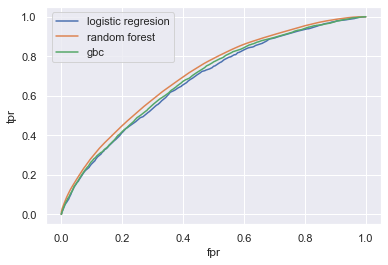

In [39]:
acc_logistic = acc(logistic_model, X, t)
acc_rf = acc(rf_model, X, t)
acc_gbc = acc(gbc_model, X, t)

print(f'accuracy for logistic regression model = {acc_logistic}')
print(f'accuracy for random forest model = {acc_rf}')
print(f'accuracy for gbc model = {acc_gbc}')

fpr_logistic, tpr_logistic = roc_curve(logistic_model, X, t)
fpr_rf, tpr_rf = roc_curve(rf_model, X, t)
fpr_gbc, tpr_gbc = roc_curve(gbc_model, X, t)

print('ROC curve:')
temp_data = pd.DataFrame([*zip(fpr_logistic, tpr_logistic)], columns=['fpr', 'tpr'])
sns.lineplot(data=temp_data, x='fpr', y='tpr', label='logistic regresion')
temp_data = pd.DataFrame([*zip(fpr_rf, tpr_rf)], columns=['fpr', 'tpr'])
sns.lineplot(data=temp_data, x='fpr', y='tpr', label='random forest')
temp_data = pd.DataFrame([*zip(fpr_gbc, tpr_gbc)], columns=['fpr', 'tpr'])
sns.lineplot(data=temp_data, x='fpr', y='tpr', label='gbc')
plt.legend()
plt.show()

From here we can see that the random forest model gives the best result, and so the propensity score will be calculated using that model.

In [40]:
data["propensity"]=ps_rf

### Overlap:

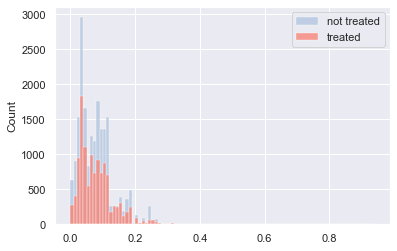

In [41]:
treated, not_treated = data.loc[data['T']==1, 'propensity'].values ,data.loc[data['T']==0, 'propensity'].values
sns.set(style='darkgrid')
sns.histplot(not_treated, label='not treated', kde=False, binwidth=0.01, color='lightsteelblue')
sns.histplot(treated, label='treated', kde=False, binwidth=0.01, color='salmon')
plt.legend()
plt.show()

# ATE:

Calculating best model to use for S-learned:

In [42]:
X, y = df.drop(columns='AMDEYR'), df['AMDEYR']

reg = LogisticRegression(random_state=0).fit(X, y)
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0).fit(X,y) 
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X, y)

accuracy for logistic regression model = 0.91953125
accuracy for random forest model = 0.92153125
accuracy for gbc model = 0.919625
ROC curve:


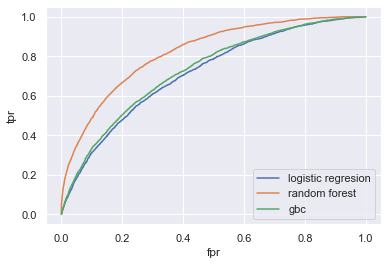

In [43]:
acc_logistic = acc(reg, X, y)
acc_rf = acc(rf, X, y)
acc_gbc = acc(gbc, X, y)

print(f'accuracy for logistic regression model = {acc_logistic}')
print(f'accuracy for random forest model = {acc_rf}')
print(f'accuracy for gbc model = {acc_gbc}')

fpr_logistic, tpr_logistic = roc_curve(reg, X, y)
fpr_rf, tpr_rf = roc_curve(rf, X, y)
fpr_gbc, tpr_gbc = roc_curve(gbc, X, y)

print('ROC curve:')
temp_data = pd.DataFrame([*zip(fpr_logistic, tpr_logistic)], columns=['fpr', 'tpr'])
sns.lineplot(data=temp_data, x='fpr', y='tpr', label='logistic regresion')
temp_data = pd.DataFrame([*zip(fpr_rf, tpr_rf)], columns=['fpr', 'tpr'])
sns.lineplot(data=temp_data, x='fpr', y='tpr', label='random forest')
temp_data = pd.DataFrame([*zip(fpr_gbc, tpr_gbc)], columns=['fpr', 'tpr'])
sns.lineplot(data=temp_data, x='fpr', y='tpr', label='gbc')
plt.legend()
plt.show()

Also here we can see that the best model for S-learner is Random Forest.

Now we will calculate the best model for T-learner and Double-Robust:

In [44]:
def get_2_dfs(df):
    df_treated = df.loc[df['T']==1]
    df_not = df.loc[df['T']==0]
    X_t, y_t = df_treated.drop(columns=['T','AMDEYR']), df_treated['AMDEYR']
    X_not, y_not = df_not.drop(columns=['T', 'AMDEYR']), df_not['AMDEYR']
    return X_t, y_t, X_not, y_not 

In [45]:
X_t, y_t, X_c, y_c = get_2_dfs(data)

reg_t = LogisticRegression(random_state=0).fit(X_t, y_t)
rf_t = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0).fit(X_t,y_t) 
gbc_t = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_t, y_t)

reg_c = LogisticRegression(random_state=0).fit(X_c, y_c)
rf_c = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0).fit(X_c,y_c) 
gbc_c = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_c, y_c)

c:\users\gony\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\gony\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

for treated:
accuracy for logistic regression model = 0.8949987559094302
accuracy for random forest model = 0.8962428464792237
accuracy for gbc model = 0.8954963921373476
ROC curve:


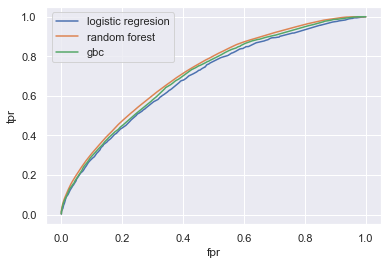

In [46]:
print('for treated:')
acc_logistic_t = acc(reg_t, X_t, y_t)
acc_rf_t = acc(rf_t, X_t, y_t)
acc_gbc_t = acc(gbc_t, X_t, y_t)

print(f'accuracy for logistic regression model = {acc_logistic_t}')
print(f'accuracy for random forest model = {acc_rf_t}')
print(f'accuracy for gbc model = {acc_gbc_t}')

fpr_logistic, tpr_logistic = roc_curve(reg_t, X_t, y_t)
fpr_rf, tpr_rf = roc_curve(rf_t, X_t, y_t)
fpr_gbc, tpr_gbc = roc_curve(gbc_t, X_t, y_t)

print('ROC curve:')
temp_data = pd.DataFrame([*zip(fpr_logistic, tpr_logistic)], columns=['fpr', 'tpr'])
sns.lineplot(data=temp_data, x='fpr', y='tpr', label='logistic regresion')
temp_data = pd.DataFrame([*zip(fpr_rf, tpr_rf)], columns=['fpr', 'tpr'])
sns.lineplot(data=temp_data, x='fpr', y='tpr', label='random forest')
temp_data = pd.DataFrame([*zip(fpr_gbc, tpr_gbc)], columns=['fpr', 'tpr'])
sns.lineplot(data=temp_data, x='fpr', y='tpr', label='gbc')
plt.legend()
plt.show()

for control:
accuracy for logistic regression model = 0.9356165070450785
accuracy for random forest model = 0.9358170786742215
accuracy for gbc model = 0.9358170786742215
ROC curve:


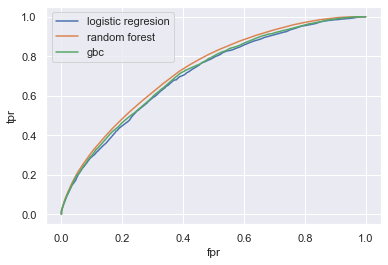

In [81]:
print('for control:')
acc_logistic_c = acc(reg_c, X_c, y_c)
acc_rf_c = acc(rf_c, X_c, y_c)
acc_gbc_c = acc(gbc_c, X_c, y_c)

print(f'accuracy for logistic regression model = {acc_logistic_c}')
print(f'accuracy for random forest model = {acc_rf_c}')
print(f'accuracy for gbc model = {acc_gbc_c}')

fpr_logistic, tpr_logistic = roc_curve(reg_c, X_c, y_c)
fpr_rf, tpr_rf = roc_curve(rf_c, X_c, y_c)
fpr_gbc, tpr_gbc = roc_curve(gbc_c, X_c, y_c)

print('ROC curve:')
temp_data = pd.DataFrame([*zip(fpr_logistic, tpr_logistic)], columns=['fpr', 'tpr'])
sns.lineplot(data=temp_data, x='fpr', y='tpr', label='logistic regresion')
temp_data = pd.DataFrame([*zip(fpr_rf, tpr_rf)], columns=['fpr', 'tpr'])
sns.lineplot(data=temp_data, x='fpr', y='tpr', label='random forest')
temp_data = pd.DataFrame([*zip(fpr_gbc, tpr_gbc)], columns=['fpr', 'tpr'])
sns.lineplot(data=temp_data, x='fpr', y='tpr', label='gbc')
plt.legend()
plt.show()

Here we also received that the Random Forest model is better for T-learner and Double-Robust.

In [47]:
def naive(df):    
    treated_outcome = np.mean(df[df['T'] == 1]['AMDEYR'])
    control_outcome = np.mean(df[df['T'] == 0]['AMDEYR'])

    naive_ATE = treated_outcome - control_outcome
    return(naive_ATE)

def ipw(df):
    a = sum(row['T']* row['AMDEYR']/row['propensity'] for i, row in df.iterrows())/sum(df['T'].values)/len(df)
    b = sum((1-row['T'])* row['AMDEYR']/(1-row['propensity']) for i, row in df.iterrows())/len(df)
    ate_ipw = a-b
    return ate_ipw    

def ate_s_l(df):
    X, y = df.drop(columns='AMDEYR'), df['AMDEYR']
    reg = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0).fit(X, y)
    ATE  = 0
    count = 0
    for i,row in X.iterrows():
        count+=1
        temp1 = row
        temp0 = row
        temp1['T'] = 1
        temp1 = temp1.to_frame().T
        temp0['T'] = 0
        temp0 = temp0.to_frame().T
        ATE += reg.predict(temp1)- reg.predict(temp0)
    return (ATE/count)[0]

def ate_t_l(df):
    X_t, y_t, X_not, y_not = get_2_dfs(df)
    reg1 = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0).fit(X_t, y_t)
    reg0 = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0).fit(X_not, y_not)

    ATE  = 0
    count = 0
    for i,row in df.iterrows():
        count+=1
        temp = row.to_frame().T
        temp = temp.drop(columns=['T', 'AMDEYR'])
        ATE += reg1.predict(temp)- reg0.predict(temp)
    return (ATE/count)[0]
                                        
def matching(df):
    X0, t0, y0 = df[df['T']==0].drop(columns=['T','AMDEYR']), df[df['T']==0]['T'],df[df['T']==0]['AMDEYR'] 
    X1, t1, y1 = df[df['T']==1].drop(columns=['T','AMDEYR']), df[df['T']==1]['T'],df[df['T']==1]['AMDEYR'] 
    X, t, y = df.drop(columns=['T','AMDEYR']), df['T'],df['AMDEYR'] 
    knn0 = NearestNeighbors(n_neighbors=1).fit(X0)
    knn1 = NearestNeighbors(n_neighbors=1).fit(X1)
    dists0 = knn1.kneighbors(X0,return_distance=False)[:,0]
    dists1 = knn0.kneighbors(X1,return_distance=False)[:,0]
    count= 0
    ATE = 0
    y0 = np.asarray(y0)
    y1 = np.asarray(y1)
    for i in range(len(X1)):
        y = y1[i]
        index = dists1[i]
        neib = y0[index]
        count +=1
        ATE += y-neib
    for i in range(len(X0)):
        y = y0[i]
        index = dists0[i]
        neib = y1[index]
        count += 1
        ATE += neib-y
    return ATE/count

def doubly_robust(df):
    X, y = df.drop(columns='AMDEYR'), df['AMDEYR']
    ps =df['propensity']
#     mu0 = LogisticRegression(C=1e6, max_iter=1000).fit(df.query(f"{'T'}==0")[X], df.query(f"{'T'}==0")[Y]).predict(df[X])
#     mu1 = LogisticRegression(C=1e6, max_iter=1000).fit(df.query(f"{'T'}==1")[X], df.query(f"{'T'}==1")[Y]).predict(df[X])
    X_t, y_t, X_not, y_not = get_2_dfs(df)
    reg1 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0).fit(X_t, y_t)
    reg0 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0).fit(X_not, y_not)
    mu1 = reg1.predict(X.drop(columns=['T']))
    mu0= reg0.predict(X.drop(columns=['T']))
    return (
        np.mean(df['T']*(df['AMDEYR'] - mu1)/ps + mu1) -
        np.mean((1-df['T'])*(df['AMDEYR'] - mu0)/(1-ps) + mu0)
    )

### Bootstrap Confidence Intervals

ATE with backdoor cretiria:

In [48]:
X, t = data.drop(columns=['T','AMDEYR']), data['AMDEYR']

In [65]:
B = 100
n = 8000
def ci(data):
    squares = [0] * 6
    sums = [0] * 6
    naives = [0] * B
    ipws = [0] * B
    sls = [0] * B
    tls = [0] * B
    drs = [0] * B
    matchs = [0] * B

    for b in range(B):
        boot_df = data.sample(n, replace=True).reset_index(inplace=False)
        boot_df.drop(columns=['index'], inplace=True)
        
        #Naive
        naive_ate = naive(boot_df)
        naives[b] = naive_ate
        sums[0] += naive_ate
        squares[0] += naive_ate ** 2
        
        # IPW
        ipw_ate = ipw(boot_df)
        ipws[b] = ipw_ate
        sums[1] += ipw_ate
        squares[1] += ipw_ate ** 2

        # S-learner
        s_ate = ate_s_l(boot_df)
        sls[b] = s_ate
        sums[2] += s_ate
        squares[2] += s_ate ** 2

        # T-learner
        t_ate = ate_t_l(boot_df)
        tls[b] = t_ate
        sums[3] += t_ate
        squares[3] += t_ate ** 2

        # Matching
        match_ate = matching(boot_df)
        matchs[b] = match_ate
        sums[4] += match_ate
        squares[4] += match_ate ** 2

        # Double Robust
        drs_ate = doubly_robust(boot_df)
        drs[b] = drs_ate
        sums[5] += drs_ate
        squares[5] += drs_ate ** 2
    return squares, sums, naives, ipws, sls, tls, drs, matchs, avg_ate

In [67]:
squares, sums, naives,ipws, sls, tls, drs, matchs, avg_ate = ci(data)

In [68]:
stds = (np.array(squares)/B - (np.array(sums)/B)**2)**0.5
print("Naive: mean:", np.mean(np.array(naives)), "ic:", (np.mean(np.array(naives)) - 2 * stds[0],  np.mean(np.array(naives)) + 2 * stds[0]))
print("IPW: mean:", np.mean(np.array(ipws)), "ic:", (np.mean(np.array(ipws)) - 2 * stds[1],  np.mean(np.array(ipws)) + 2 * stds[1]))
print("S-learner: mean:", np.mean(np.array(sls)), "ic:", (np.mean(np.array(sls)) - 2 * stds[2],  np.mean(np.array(sls)) + 2 * stds[2]))
print("T-learner: mean:", np.mean(np.array(tls)), "ic:", (np.mean(np.array(tls)) - 2 * stds[3],  np.mean(np.array(tls)) + 2 * stds[3]))
print("Matching: mean:", np.mean(np.array(matchs)), "ic:", (np.mean(np.array(matchs)) - 2 * stds[4],  np.mean(np.array(matchs)) + 2 * stds[4]))
print("Doubly-Robust: mean:", np.mean(np.array(drs)), "ic:", (np.mean(np.array(drs)) - 2 * stds[5],  np.mean(np.array(drs)) + 2 * stds[5]))

Naive: mean: 0.0406455231362305 ic: (0.02781767618640416, 0.05347337008605685)
IPW: mean: -0.04760259312278204 ic: (-0.05338749109198589, -0.04181769515357819)
S-learner: mean: 0.00039625000000000006 ic: (-0.0009657590858727777, 0.001758259085872778)
T-learner: mean: 0.0022549999999999996 ic: (-0.0028094496245890358, 0.0073194496245890354)
Matching: mean: 0.036116249999999996 ic: (-0.008719230579001251, 0.08095173057900124)
Doubly-Robust: mean: 0.4272727086899702 ic: (0.3563977842638685, 0.4981476331160719)


In [69]:
print('Calculating ATE')
naive_ate = naive(data)
ipw_ate = ipw(data)
sl_ate = ate_s_l(data)
tl_ate = ate_t_l(data)
matching_ate = matching(data)
dr_ate = doubly_robust(data)
print('Naive ATE: ', naive_ate)
print('IPW ATE: ', ipw_ate)
print('S-learner ATE: ', sl_ate)
print('T-learner ATE: ', tl_ate)
print('Matching ATE: ', matching_ate)
print('Double-Robust ATE: ', dr_ate)

Calculating ATE
Naive ATE:  0.04081263349738096
IPW ATE:  -0.04747848157879509
S-learner ATE:  3.125e-05
T-learner ATE:  0.0003125
Matching ATE:  0.08821875
Double-Robust ATE:  0.440271669897948


# CATE:

Categorial ATE based on gender.

In [70]:
df_men = df[df['IRSEX']==1].drop(columns=['IRSEX'])
df_women = df[df['IRSEX']==2].drop(columns=['IRSEX'])

data_men = pd.get_dummies(df_men ,columns =  ['IRMARIT', 'NEWRACE2', 'EDUHIGHCAT', 'INCOME'])
X_men, t_men = data_men.drop(columns=['T', 'AMDEYR']), data_men['T'] 
ps_rf, rf_model = propensity_randomforest(X_men, t_men)
data_men['propensity'] = ps_rf

data_women = pd.get_dummies(df_women ,columns =  ['IRMARIT', 'NEWRACE2', 'EDUHIGHCAT', 'INCOME'])
X_women, t_women = data_women.drop(columns=['T', 'AMDEYR']), data_women['T'] 
ps_rf, rf_model = propensity_randomforest(X_women, t_women)
data_women['propensity'] = ps_rf

Calculating ATE for men:

In [71]:
naive_ate = naive(data_men)
ipw_ate = ipw(data_men)
sl_ate = ate_s_l(data_men)
tl_ate = ate_t_l(data_men)
matching_ate = matching(data_men)
dr_ate = doubly_robust(data_men)
print('Naive ATE for men: ', naive_ate)
print('IPW ATE for men: ', ipw_ate)
print('S-learner ATE for men: ', sl_ate)
print('T-learner ATE for men: ', tl_ate)
print('Matching ATE for men: ', matching_ate)
print('Double-Robust ATE for men: ', dr_ate)

Naive ATE for men:  0.017650494557368
IPW ATE for men:  -0.04654855243347479
S-learner ATE for men:  0.0
T-learner ATE for men:  6.983240223463687e-05
Matching ATE for men:  0.01494413407821229
Double-Robust ATE for men:  0.014744374545700017


In [72]:
squares, sums, naives, ipws, sls, tls, drs, matchs, avg_ate = ci(data_men)

In [73]:
stds = (np.array(squares)/B - (np.array(sums)/B)**2)**0.5
print("Naive: mean:", np.mean(np.array(naives)), "ic:", (np.mean(np.array(naives)) - 2 * stds[0],  np.mean(np.array(naives)) + 2 * stds[0]))
print("IPW: mean:", np.mean(np.array(ipws)), "ic:", (np.mean(np.array(ipws)) - 2 * stds[1],  np.mean(np.array(ipws)) + 2 * stds[1]))
print("S-learner: mean:", np.mean(np.array(sls)), "ic:", (np.mean(np.array(sls)) - 2 * stds[2],  np.mean(np.array(sls)) + 2 * stds[2]))
print("T-learner: mean:", np.mean(np.array(tls)), "ic:", (np.mean(np.array(tls)) - 2 * stds[3],  np.mean(np.array(tls)) + 2 * stds[3]))
print("Matching: mean:", np.mean(np.array(matchs)), "ic:", (np.mean(np.array(matchs)) - 2 * stds[4],  np.mean(np.array(matchs)) + 2 * stds[4]))
print("Doubly-Robust: mean:", np.mean(np.array(drs)), "ic:", (np.mean(np.array(drs)) - 2 * stds[5],  np.mean(np.array(drs)) + 2 * stds[5]))

Naive: mean: 0.0171658511223958 ic: (0.005314337087135768, 0.029017365157655836)
IPW: mean: -0.04674675462019641 ic: (-0.05301379179160873, -0.04047971744878409)
S-learner: mean: 2.625e-05 ic: (-0.0001406893602479655, 0.0001931893602479655)
T-learner: mean: 0.0015337500000000002 ic: (-0.005666584627640579, 0.00873408462764058)
Matching: mean: 0.018271250000000003 ic: (0.0006283670510599318, 0.035914132948940074)
Doubly-Robust: mean: 0.010768665602361642 ic: (-0.0005985838789276908, 0.022135915083650974)


Calculating ATE for women:

In [74]:
naive_ate = naive(data_women)
ipw_ate = ipw(data_women)
sl_ate = ate_s_l(data_women)
tl_ate = ate_t_l(data_women)
matching_ate = matching(data_women)
dr_ate = doubly_robust(data_women)
print('Naive ATE for women: ', naive_ate)
print('IPW ATE for women: ', ipw_ate)
print('S-learner ATE for women: ', sl_ate)
print('T-learner ATE for women: ', tl_ate)
print('Matching ATE for women: ', matching_ate)
print('Double-Robust ATE for women: ', dr_ate)

Naive ATE for women:  0.06237191971733687
IPW ATE for women:  -0.07841120217755072
S-learner ATE for women:  0.0
T-learner ATE for women:  0.0
Matching ATE for women:  0.06911764705882353
Double-Robust ATE for women:  0.04231968557801363


In [75]:
squares, sums, naives, ipws, sls, tls, drs, matchs, avg_ate = ci(data_women)

In [76]:
stds = (np.array(squares)/B - (np.array(sums)/B)**2)**0.5
print("Naive: mean:", np.mean(np.array(naives)), "ic:", (np.mean(np.array(naives)) - 2 * stds[0],  np.mean(np.array(naives)) + 2 * stds[0]))
print("IPW: mean:", np.mean(np.array(ipws)), "ic:", (np.mean(np.array(ipws)) - 2 * stds[1],  np.mean(np.array(ipws)) + 2 * stds[1]))
print("S-learner: mean:", np.mean(np.array(sls)), "ic:", (np.mean(np.array(sls)) - 2 * stds[2],  np.mean(np.array(sls)) + 2 * stds[2]))
print("T-learner: mean:", np.mean(np.array(tls)), "ic:", (np.mean(np.array(tls)) - 2 * stds[3],  np.mean(np.array(tls)) + 2 * stds[3]))
print("Matching: mean:", np.mean(np.array(matchs)), "ic:", (np.mean(np.array(matchs)) - 2 * stds[4],  np.mean(np.array(matchs)) + 2 * stds[4]))
print("Doubly-Robust: mean:", np.mean(np.array(drs)), "ic:", (np.mean(np.array(drs)) - 2 * stds[5],  np.mean(np.array(drs)) + 2 * stds[5]))

Naive: mean: 0.06137844818195726 ic: (0.04551029646888844, 0.07724659989502608)
IPW: mean: -0.07833668070933561 ic: (-0.0857191746059191, -0.07095418681275212)
S-learner: mean: 9.375e-05 ic: (-0.00046232441048838055, 0.0006498244104883805)
T-learner: mean: 0.0007912500000000002 ic: (-0.002686366820467718, 0.004268866820467719)
Matching: mean: 0.053305000000000005 ic: (0.029719296703299522, 0.07689070329670049)
Doubly-Robust: mean: 0.03509271375329905 ic: (0.01858166897760737, 0.05160375852899074)
